# ASSIGNMENT 29

In [1]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

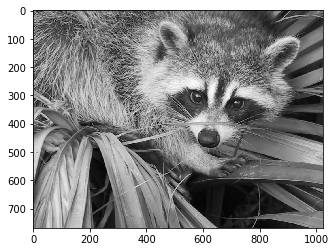

In [2]:
# Accessing and displaying the face of racoon
face = sp.misc.face(gray=True)
plt.imshow(face, cmap=plt.cm.gray)

In [3]:
# Compressing the grey-scale image into 5 clusters

n_clusters = 5
X = face.reshape((-1, 1))  
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

#Creating an array from labels and values
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

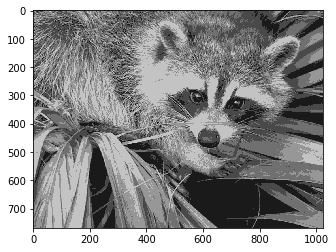

In [4]:
#Displaying the Compressed Image
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

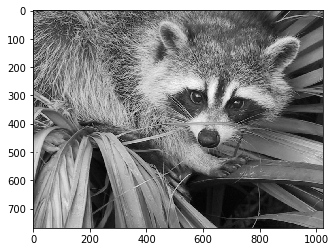

In [5]:
#Displaying the Raw Image
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

Text(0.5, 1.0, 'COMPRESSED IMAGE')

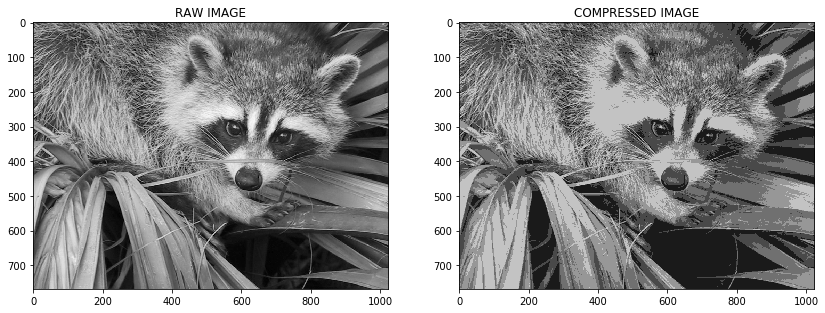

In [6]:
# Displaying both the images for comparision
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,7))
ax1.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)
ax1.set_title("RAW IMAGE") 
ax2.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
ax2.set_title("COMPRESSED IMAGE") 

In [7]:
# The compressed has a low quality when compared to the raw image.The raw image is clearer, just as expected.

from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_mse as mse

# Comparing the Mean Squared Error of the images - the 'Mean Squared Error' between the two images is the
# sum of the squared difference between the two images; the lower the error, the more "similar"  the two images are 

mse = mse(face,face_compressed)

# SSIM-Structural Similarity Index Method-the SSIM value can vary between -1 and 1, where 1 indicates perfect similarity

ssim = ssim(face,face_compressed)

print("MSE:",mse)
print("SSIM:",ssim)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\_structural_similarity.py:149: UserWarning: Inputs have mismatched dtype.  Setting data_range based on X.dtype.
  warn("Inputs have mismatched dtype.  Setting data_range based on "


MSE: 155.74962166479776
SSIM: 0.7829347949439494


C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]
